In [20]:
import numpy as np

import sys
sys.path.append('../')
import mapache

from bs4 import BeautifulSoup, NavigableString
import urllib.request

%matplotlib inline

# Parsing the wikipedia polls page

A party is created from its name(s) and the party logo, that will be used to represent the party

Name: Ciudadanos
Full name: Ciudadanos - Partido de la Ciudadanía
Short name: C's


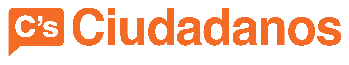

In [23]:
ciudadanos = mapache.Party('Ciudadanos',
                   'https://www.ciudadanos-cs.org/var/public/sections/page-imagen-del-partido/logo-ciudadanos.jpg',
                   short_name = 'C\'s',
                   full_name = 'Ciudadanos - Partido de la Ciudadanía')

ciudadanos.show()

We recover the table with all the polls for the 2016 Spanish National elections

In [21]:
wiki = "https://es.wikipedia.org/wiki/Anexo:Sondeos_de_intenci%C3%B3n_de_voto_para_las_elecciones_generales_de_Espa%C3%B1a_de_2016"
page = urllib.request.urlopen(wiki)
soup = BeautifulSoup(page, "html.parser")
table = soup.find("table", { "class" : "wikitable" })

## Creating the parties

The first row of the table is parsed to get the name and parties. Party logos are extracted from their wikipedia pages

In [9]:
spanish_parties = mapache.PartySet()

In [10]:
row = table.findAll("tr")[0]
cells = row.findAll("th")
for c in cells:
    refs = c.findAll("a")
    if not len(refs):
        continue        
    party_name = refs[0].contents[0]
    url = "http://es.wikipedia.org" + refs[0].attrs["href"]
    if type(party_name) != NavigableString:
        party_name = party_name.contents[0]
    print(party_name, url)
    
    wiki = url
    page = urllib.request.urlopen(wiki)
    party_soup = BeautifulSoup(page, "html.parser")
    img = party_soup.find("table", {"class": "infobox"}).find("img")
    if img:
        img = "http:" + img['src']
    else:
        continue
    
    party = mapache.Party(party_name, img,
                   short_name = party_name,
                   full_name = party_soup.find("h1", {"id":"firstHeading"}).contents[0])
    spanish_parties.add(party)

PP http://es.wikipedia.org/wiki/Partido_Popular
PSOE http://es.wikipedia.org/wiki/Partido_Socialista_Obrero_Espa%C3%B1ol
C’s http://es.wikipedia.org/wiki/Ciudadanos-Partido_de_la_Ciudadan%C3%ADa
Podemos http://es.wikipedia.org/wiki/Podemos_(partido_pol%C3%ADtico)
ECP http://es.wikipedia.org/wiki/En_Com%C3%BA_Podem
A la valenciana http://es.wikipedia.org/wiki/Comprom%C3%ADs-Podemos-EUPV:_A_la_valenciana
En Marea http://es.wikipedia.org/wiki/En_Marea
IU http://es.wikipedia.org/wiki/Izquierda_Unida_(Espa%C3%B1a)
ERC-CATSÍ http://es.wikipedia.org/wiki/Esquerra_Republicana_de_Catalunya-Catalunya_S%C3%AD
CDC http://es.wikipedia.org/wiki/Democr%C3%A0cia_i_Llibertat
EAJ-PNV http://es.wikipedia.org/wiki/Partido_Nacionalista_Vasco
EH Bildu http://es.wikipedia.org/wiki/Euskal_Herria_Bildu
CCa http://es.wikipedia.org/wiki/Coalici%C3%B3n_Canaria



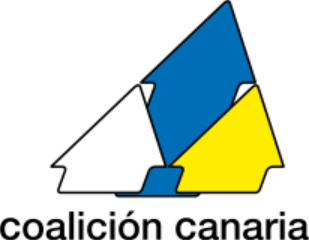
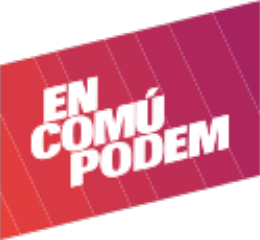
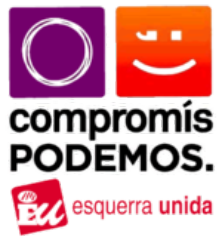
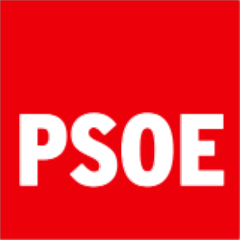
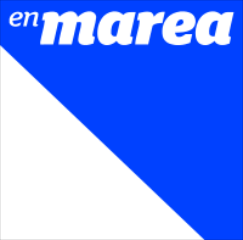
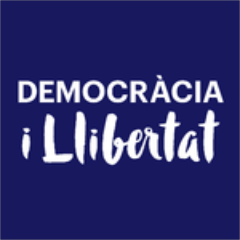
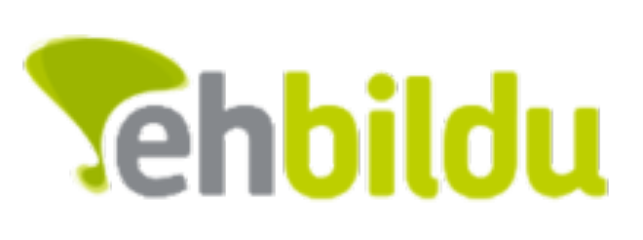
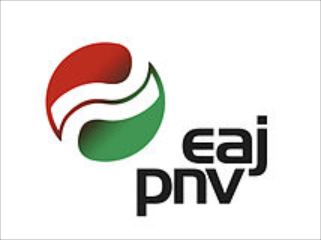
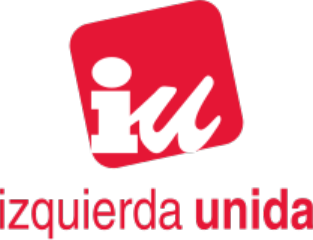
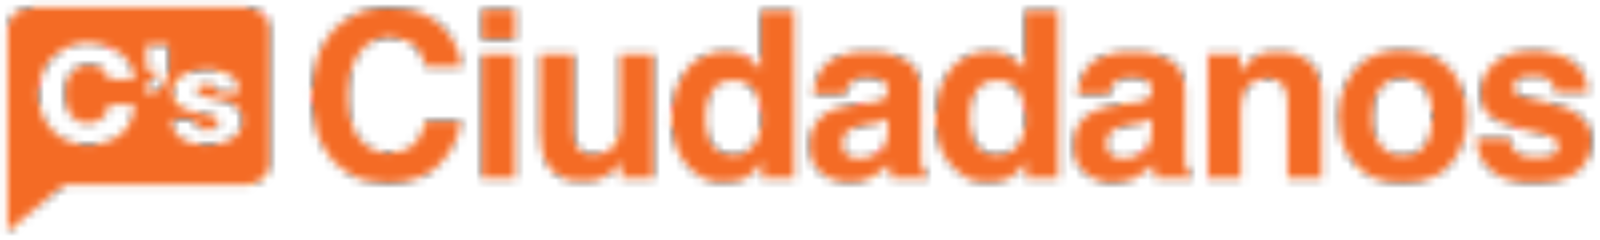
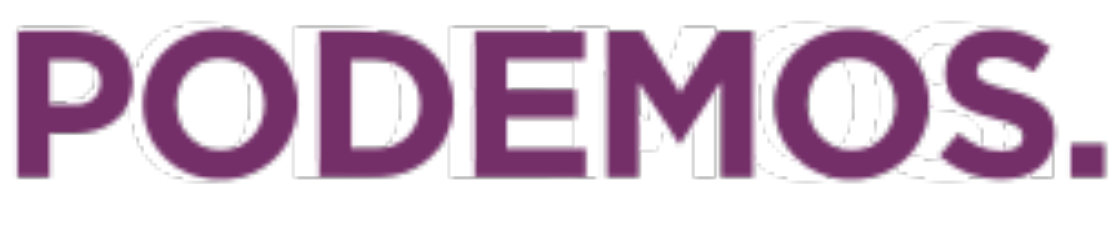
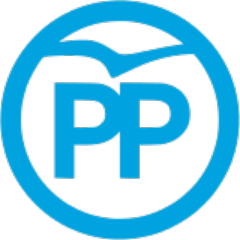

In [11]:
spanish_parties.show_parties()

A few parties are part of the 'Unidos Podemos' coallition, we create it: 

In [12]:
coallition_party_names = ['Podemos', 'IU', 'En marea', 'ECP', 'A la valenciana']

In [13]:
up = mapache.Party('Unidos Podemos',
                   'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Unidos_Podemos.svg/220px-Unidos_Podemos.svg.png',
                   short_name='UP')

In [14]:
for p in coallition_party_names:
    up.add_coallition_party(spanish_parties[p])
    spanish_parties.remove(p)

In [15]:
spanish_parties.add(up)


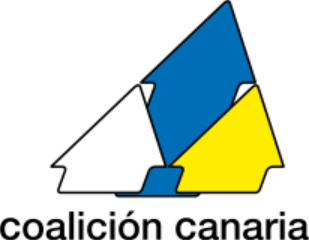
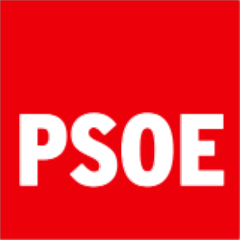
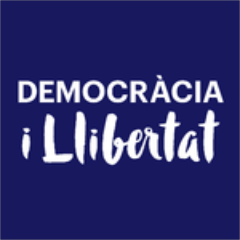
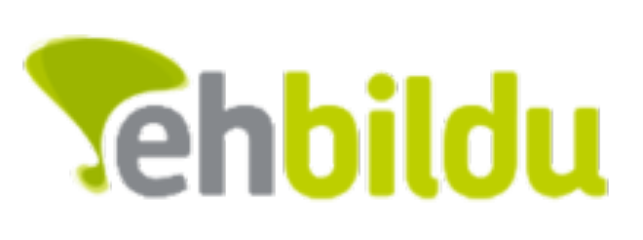
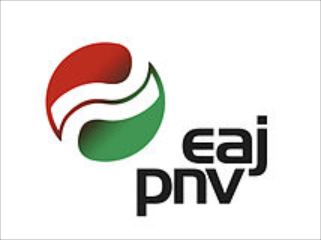
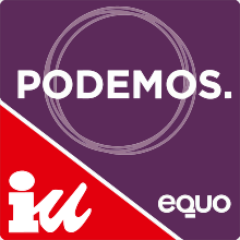
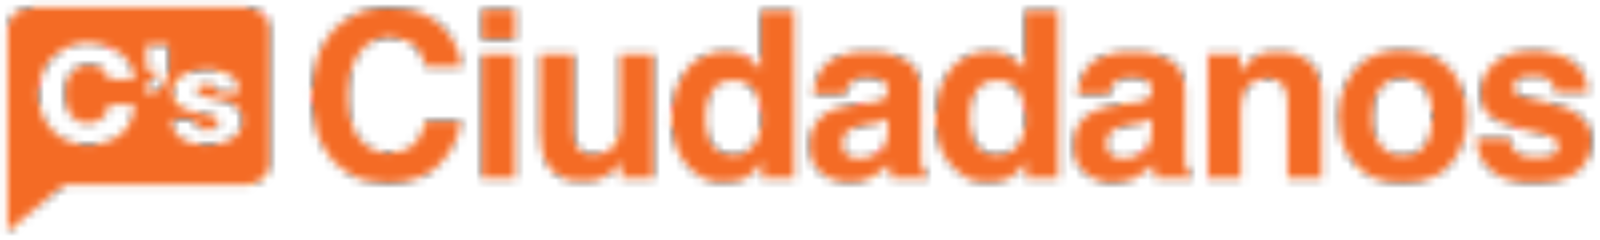
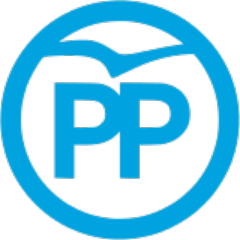

In [16]:
spanish_parties.show_parties()

## Parsing the polls

In [33]:
len(rows)

24

In [137]:
polls = []

In [138]:
rows = table.findAll("tr")[2:]
for r in rows:
    cells = r.findAll('td')
    if cells:
        
        poll = {}        
        
        pollster_name =cells[0].find('a')
        if not pollster_name:
            continue
        pollster_name = pollster_name.contents[0]
        poll['pollster'] = pollster_name
        
        err = cells[0].find('span')
        if err:
            err = err.text.split('±')
            if len(err) > 1:   
                err = err[1].split('%')[0].replace(',','.')                    
                try:
                    err = float(err)
                except ValueError:
                    err = None
            else:
                err = None
        
        poll['error'] = err
        polls.append(poll)            


In [139]:
polls

[{'error': None, 'pollster': 'Encuestamos'},
 {'error': None, 'pollster': 'Jaime Miquel & Asociados'},
 {'error': 3.0, 'pollster': 'NC Report'},
 {'error': 3.1, 'pollster': 'Netquest-Kiko Llaneras'},
 {'error': 3.5, 'pollster': 'GAD3'},
 {'error': 2.9, 'pollster': 'Metroscopia'},
 {'error': 2.25, 'pollster': 'ENCUESTAMOS'},
 {'error': 2.8, 'pollster': 'Invymark'},
 {'error': 2.0, 'pollster': 'CIS'},
 {'error': None, 'pollster': 'Invymark'},
 {'error': 3.3, 'pollster': 'NC Report'},
 {'error': 3.1, 'pollster': 'TNS Demoscopia'},
 {'error': 2.25, 'pollster': 'ENCUESTAMOS'},
 {'error': 2.3, 'pollster': 'ENCUESTAMOS'},
 {'error': 2.0, 'pollster': 'CIS'},
 {'error': 3.5, 'pollster': 'GAD3'},
 {'error': None, 'pollster': 'Llorente & Cuenca'},
 {'error': None, 'pollster': 'Metroscopia'},
 {'error': None, 'pollster': 'Invymark'},
 {'error': None, 'pollster': 'Noticias Cuatro'},
 {'error': None, 'pollster': <b>Elecciones generales</b>}]

In [108]:
"3.1".isnumber()

AttributeError: 'str' object has no attribute 'isnumber'

'2,3'

In [75]:
c.text

'(1800) Margen de error: ±2,3%'

In [76]:
cells[0].find('span').contents[0].split('±')[1].split('%')[0]

AttributeError: 'NoneType' object has no attribute 'contents'

## Matching polls to parties

## Visualizing a poll

## Visualizing several polls